In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import random
import pandas as pd

In [2]:
class guassian:
    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma
        
    def draw(self, draws=1):
        return np.random.normal(self.mu, self.sigma, draws)

In [17]:
class dp:
    def __init__(self, mu, sigma, a):
        self.H = guassian(mu,sigma)
        self.o = pd.DataFrame([self.H.draw()])
        self.a = a
        
    def p_a(self):
        return (self.a)/(self.a+len(self.o.values.flatten()))
    
    def p_x(self,x):
        return (len(self.o[self.o[0]==x]))/(self.a+len(self.o.values.flatten()))
    
    def groups(self):
        if len(self.o) > 0:
            return self.o.drop_duplicates()
        else:
            return self.o
        
    def plot_h(self):
        return sns.distplot(self.H.draw(100000), bins=200, kde=False)
    
    def add(self):
        groups = self.groups()
        x = np.append(groups, self.H.draw())
        p = [self.p_x(x) for x in groups.values.flatten()] + [self.p_a()]
            
        choice = np.random.choice(x, 1, p=p)
        
        self.o = pd.DataFrame(np.append(self.o.values.flatten(), choice))
        
    def plot(self):
        return sns.distplot(self.o.values.flatten(), bins=200, kde=False)

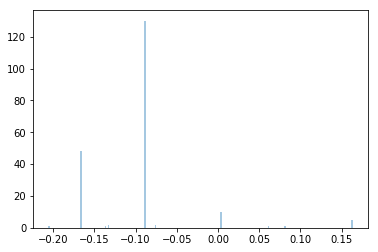

In [18]:
mu, sigma, a = 0, 0.1, 1.5
_dp = dp(mu, sigma, a)

x = [_dp.add() for x in range(200)]
_dp.plot()